In [7]:
#All necessary imports for modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#Required prediction modelling libraries are imported
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, precision_score, precision_recall_fscore_support, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTEN
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost
from xgboost import XGBClassifier

import pickle
import json


In [6]:
#Reading in final dataset

In [4]:
df = pd.read_csv('./data/final_data.csv')

In [5]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,0.633333,0.933333,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"['love', 'dress', 'sooo', 'pretty', 'happened'...",love dress sooo pretty happened find store gla...,0.318750,0.725000,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"['high', 'hope', 'dress', 'really', 'wanted', ...",high hope dress really wanted work initially o...,0.079865,0.349762,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"['shirt', 'very', 'flattering', 'due', 'adjust...",shirt very flattering due adjustable front tie...,0.393750,0.568750,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing_ID              22640 non-null  int64  
 1   Age                      22640 non-null  int64  
 2   Title                    19675 non-null  object 
 3   Review_Text              22640 non-null  object 
 4   Rating                   22640 non-null  int64  
 5   Recommended_IND          22640 non-null  int64  
 6   Positive_Feedback_Count  22640 non-null  int64  
 7   Division_Name            22627 non-null  object 
 8   Department Name          22627 non-null  object 
 9   Class_Name               22627 non-null  object 
 10  Polarity                 22640 non-null  float64
 11  Subjective               22640 non-null  float64
 12  Clean                    22640 non-null  object 
 13  String                   22640 non-null  object 
 14  Polarity_Clean        

In [9]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Polarity                      0
Subjective                    0
Clean                         0
String                        0
Polarity_Clean                0
Subjective_Clean              0
Positive_Rating               0
dtype: int64

In [10]:
#Confimring no nulls in String column

# Modeling

### Train-Test Split With df

In [11]:
# Specify X as the cleaned strings in df and y as the target-Positive_Rating.
X = df['String']
y = df['Positive_Rating']

In [12]:
#Performed the train-test split, using 20% for the hold-out data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20)

In [13]:
X_train

19805                   love contrast much prettier person
11396    top look better hanger looking feminine plaid ...
7884     much question whether love pant several pair p...
21304    legging warm comfortable thick enough wear pan...
7216                     much lower quality robe purchased
                               ...                        
11964    bought grey gorgeous color like long length ar...
21575    dress really pretty fun see dress tone subtle ...
5390     bought one tee washed time luckily hole yet li...
860      excited see jean since came petite size short ...
15795              bought sweater love one favorite season
Name: String, Length: 18112, dtype: object

### Visually inspecting vecorized data

In [14]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train)
X_train_vectorized

<18112x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 467215 stored elements in Compressed Sparse Row format>

In [15]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_train_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test_vectorized = tfidf.transform(X_test)
X_test_vectorized

<4528x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 114122 stored elements in Compressed Sparse Row format>

In [17]:
# Convert to DataFrame for visual inspection
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())
X_test_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to return scores for models with  cross validation

In [ ]:
# Accuracy
accuracy = make_scorer(accuracy_score)

#f1
custom_f1 = make_scorer(
    f1_score, 
    average="weighted")

# Precision
multi_prec = make_scorer(
    precision_score,
    average="weighted")

# Recall
multi_rec = make_scorer(
    recall_score,
    average="weighted")

# This function will allow for quick cross-validation of the chosen score for each of our models.
def cross_val(model, X, y, custom_scorer, kfolds=5):
    """ Perform cross-validated scoring and store/print results """
    results = cross_val_score(model, X, y, cv=kfolds, scoring=custom_scorer)
    mean = np.mean(results)
    median = np.median(results)
    std = np.std(results)
    if custom_scorer == accuracy:
        print(f"Mean accuracy score: ", {mean}, ".")
        print(f"Median acuracy score: ", {median}, ".")
        print(f"Standard Deviation in accuracy: ", {std}, ".") 
    elif custom_scorer == custom_f1:
        print(f"Mean f1 score: ", {mean}, ".")
        print(f"Median f1 score: ", {median}, ".")
        print(f"Standard Deviation in f1 score: ", {std}, ".") 
    elif custom_scorer == multi_prec:
        print(f"Mean precision score: ", {mean}, ".")
        print(f"Median precision score: ", {median}, ".")
        print(f"Standard Deviation in precision score: ", {std}, ".") 
    elif custom_scorer == multi_rec:
        print(f"Mean recall score: ", {mean}, ".")
        print(f"Median recall score: ", {median}, ".")
        print(f"Standard Deviation in recall score: ", {std}, ".") 

## Dummy Classifier

0.770428445229682


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


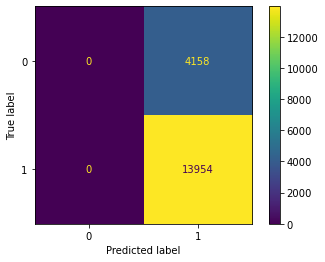

In [18]:
# Instantiate Dummy Classifier 
dummy_model = DummyClassifier()

#Fit and Evaluate Dummy Classifier
dummy_model.fit(X_train_vectorized, y_train)
dummy_yhat = dummy_model.predict(X_train)
plot_confusion_matrix(dummy_model, X_train, y_train);
print(accuracy_score(y_train, dummy_yhat))

We see our Dummy Model predicts our majority label, 1, for each observation. Due to class imbalance, the model performed well at 77% accuracy score.